In [7]:
import pandas as pd
import numpy as np
import os
import warnings
import joblib
import shutil
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [8]:
#Visualiztion Libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
#Modelling Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Creating Pipeline
from sklearn.pipeline import Pipeline


In [10]:
#Importing modelling libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

#Model Evaluation
from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    precision_score,
    recall_score,
    f1_score,
    matthews_corrcoef,
    classification_report,
    confusion_matrix
)

In [11]:
filepath = 'data'
filetrain = 'train.csv'

df = pd.read_csv(os.path.join(filepath, filetrain))
df.head(3)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2


In [12]:
print('Shape of the dataset:')
df.shape

Shape of the dataset:


(1599, 21)

In [13]:
print('Summary of the Dataset')
df.describe()

Summary of the Dataset


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,1242.781113,0.481551,1.520513,0.508443,4.292683,0.515947,32.355222,0.500688,140.848655,4.513446,9.870544,647.308943,1251.543465,2125.333959,12.329581,5.779862,11.124453,0.760475,0.509068,0.510319,1.505941
std,439.266992,0.499816,0.816448,0.500085,4.348624,0.499902,18.117580,0.287069,35.271975,2.303268,6.087606,445.540397,429.056641,1092.616850,4.213878,4.357931,5.421775,0.426927,0.500074,0.500050,1.116408
min,501.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,258.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,852.000000,0.000000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,110.000000,3.000000,4.500000,283.500000,878.500000,1202.000000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,1.000000
50%,1237.000000,0.000000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,142.000000,4.000000,10.000000,563.000000,1251.000000,2167.000000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,2.000000
75%,1618.500000,1.000000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,171.000000,7.000000,15.000000,954.000000,1617.000000,3061.000000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.500000
max,1998.000000,1.000000,3.000000,1.000000,18.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1949.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [14]:
#Checking null values count
df[df.isnull()].count()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [ ]:
#Idenify the numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
plot_cols = [col for col in numerical_cols if col != 'price_range']


#Creating the plots for the numerical columns
plt.figure(figsize=(20, 15))
plt.subplots_adjust(hspace=0.5)

for i, col in enumerate(plot_cols):
    plt.subplot(5, 4, i + 1)
    sns.boxplot(x='price_range', y=col, data=df)
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

In [ ]:
#Dividing the dataset for independent columns and target
X = df.drop('price_range', axis=1)
y = df['price_range']

### Correlation Matrix

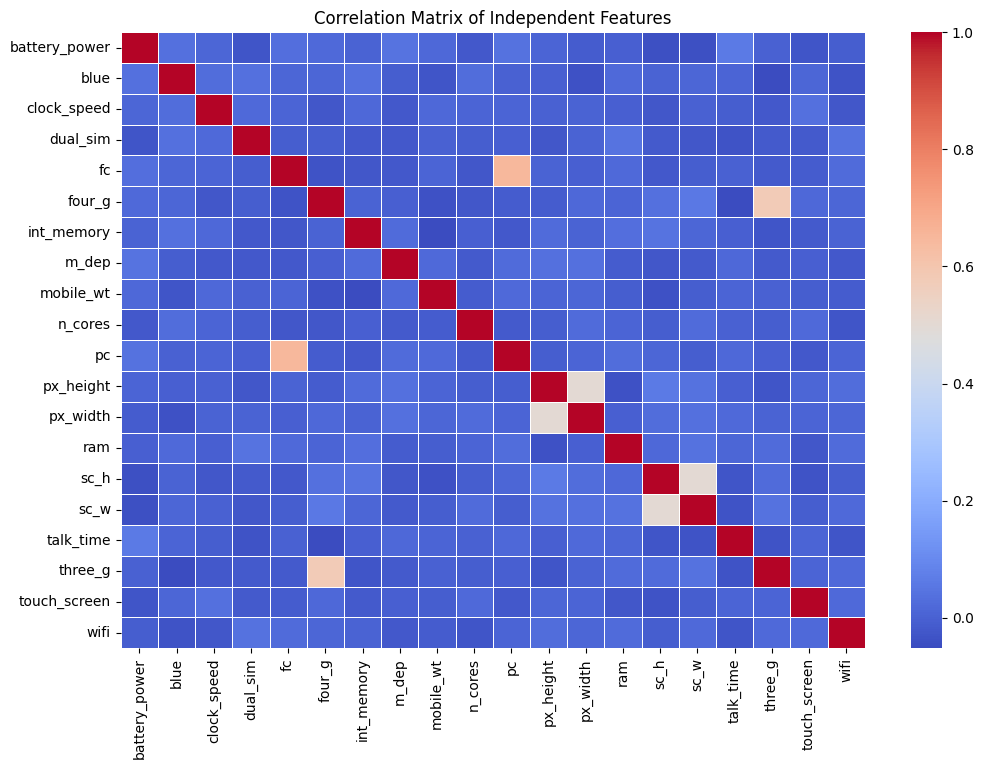

In [ ]:
corr_matrix = X.corr(method="pearson")

plt.figure(figsize=(12,8))
sns.heatmap(
    corr_matrix,
    cmap="coolwarm",
    annot=False,
    linewidths=0.5
)
plt.title("Correlation Matrix of Independent Features")
plt.show()

In [ ]:
#Train Test Split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
def compute_metrics(y_true, y_pred, y_prob):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "AUC": roc_auc_score(y_true, y_prob, multi_class="ovr"),
        "Precision": precision_score(y_true, y_pred, average="weighted"),
        "Recall": recall_score(y_true, y_pred, average="weighted"),
        "F1": f1_score(y_true, y_pred, average="weighted"),
        "MCC": matthews_corrcoef(y_true, y_pred)
    }


In [ ]:
def run_model_pipelines(
    X_train,
    y_train,
    X_test,
    y_test,
    models
):
    results = []
    trained_pipelines = {}

    for model_name, model in models:
        pipeline = Pipeline([
            ("scaler", StandardScaler()),
            ("model", model)
        ])

        pipeline.fit(X_train, y_train)

        y_pred = pipeline.predict(X_test)
        y_prob = pipeline.predict_proba(X_test)

        metrics = compute_metrics(y_test, y_pred, y_prob)
        metrics["Model"] = model_name

        results.append(metrics)
        trained_pipelines[model_name] = pipeline

    results_df = pd.DataFrame(results)
    return results_df, trained_pipelines

In [ ]:
models = [
    ("Logistic Regression", LogisticRegression(max_iter=1000)),
    ("Decision Tree", DecisionTreeClassifier(random_state=42)),
    ("KNN", KNeighborsClassifier(n_neighbors=5)),
    ("Naive Bayes", GaussianNB()),
    ("Random Forest", RandomForestClassifier(n_estimators=100, random_state=42)),
    ("XGBoost", XGBClassifier(
        eval_metric="mlogloss",
        use_label_encoder=False,
        random_state=42
    ))
]

In [ ]:
results_df, trained_pipelines = run_model_pipelines(
    X_train,
    y_train,
    X_test,
    y_test,
    models
)
print(results_df)

   Accuracy       AUC  Precision    Recall        F1       MCC  \
0  0.950000  0.996420   0.950407  0.950000  0.949989  0.933479   
1  0.850000  0.900143   0.852565  0.850000  0.850388  0.800558   
2  0.537500  0.760395   0.541759  0.537500  0.534096  0.385484   
3  0.809375  0.957282   0.809950  0.809375  0.808912  0.746306   
4  0.884375  0.980725   0.883370  0.884375  0.883570  0.846027   
5  0.928125  0.991500   0.928139  0.928125  0.928040  0.904224   

                 Model  
0  Logistic Regression  
1        Decision Tree  
2                  KNN  
3          Naive Bayes  
4        Random Forest  
5              XGBoost  


In [ ]:
results_df

,Accuracy,AUC,Precision,Recall,F1,MCC,Model
0,0.950000,0.996420,0.950407,0.950000,0.949989,0.933479,Logistic Regression
1,0.850000,0.900143,0.852565,0.850000,0.850388,0.800558,Decision Tree
2,0.537500,0.760395,0.541759,0.537500,0.534096,0.385484,KNN
3,0.809375,0.957282,0.809950,0.809375,0.808912,0.746306,Naive Bayes
4,0.884375,0.980725,0.883370,0.884375,0.883570,0.846027,Random Forest
5,0.928125,0.991500,0.928139,0.928125,0.928040,0.904224,XGBoost


In [ ]:
print('Models Implemented:')
trained_pipelines.keys()

Models


dict_keys(['Logistic Regression', 'Decision Tree', 'KNN', 'Naive Bayes', 'Random Forest', 'XGBoost'])

In [ ]:
#Saving the models

model_dir = 'model'

#Check if the directory exists; then delete
if os.path.exists(model_dir):
    shutil.rmtree(model_dir)

#Create directory
os.mkdir('model')

#Saving pipelines
for model_name, pipeline in trained_pipelines.items():
    filename = model_name.lower().replace(" ", "_") + ".pkl"
    joblib.dump(pipeline, f"model/{filename}")

In [ ]:
#Model Testing
#test_model = joblib.load("model/logistic_regression.pkl")
#test_model.predict(X_test_scaled[:5])